Input: data file in long format. Averages em_fraction for each site along all available dates

Run (#3) after calcVegAreaFromPts.py

TODO:
* Remove outliers? Or use quantiles instead of min/max?

In [1]:
import pandas as pd

In [2]:
csv_in='/mnt/f/PAD2019/Chemistry/em_fraction_csv/ABoVE_Lakes_all_em_fraction_v2.csv'
csv_out_pth='/mnt/f/PAD2019/Chemistry/em_fraction_csv/ABoVE_Lakes_all_em_fraction_average_v2.csv'
csv=pd.read_csv(csv_in)
del csv['index_right']
del csv['label']
del csv['Unnamed: 0']

csv.head()

,site,date,Latitude_dd,Longitude_dd,em_fractio,area_px_m2,perimeter_,scene_id,scene_name
0,Roche Pond,wc.sh,58.8330,-111.2830,0.511015,91219.12011,2597.406167,170613,PAD_170613_mosaic_cls_wc.sh
1,Dore Lake,wc.sh,58.7904,-111.0500,NaN,NaN,NaN,170613,PAD_170613_mosaic_cls_wc.sh
2,Little Lake,wc.sh,58.7364,-111.1220,NaN,NaN,NaN,170613,PAD_170613_mosaic_cls_wc.sh
3,Roberts Cabin Pond,wc.sh,58.8057,-111.2430,0.272269,179601.18770,2930.398492,170613,PAD_170613_mosaic_cls_wc.sh
4,Flett Lake,wc.sh,58.9539,-111.0783,NaN,NaN,NaN,170613,PAD_170613_mosaic_cls_wc.sh


In [3]:
# remove duplicates
len_before=len(csv)
# csv.drop_duplicates(['site', 'area_px_m2', 'perimeter_'], inplace=True) # 'site', 'date','scene_id'
len_after=len(csv)
print(f'Removed {len_before-len_after} duplicates')

Removed 0 duplicates


In [4]:
#example view
csv[csv.site=='Balloon Lake']

,site,date,Latitude_dd,Longitude_dd,em_fractio,area_px_m2,perimeter_,scene_id,scene_name
14,Balloon Lake,wc.sh,58.8775,-111.2264,0.752163,969996.1467,22818.696800,170613,PAD_170613_mosaic_cls_wc.sh
60,Balloon Lake,wc.sh,58.8775,-111.2264,0.498645,290876.2767,10304.228060,170908,PAD_170908_mosaic_cls_wc.sh
106,Balloon Lake,wc.sh,58.8775,-111.2264,0.518308,243199.5467,6945.401919,180821,PAD_180821_mosaic_cls_wc.sh


In [5]:
# show number of obs
csv_count=csv[csv['em_fractio']>0][['em_fractio', 'site']].groupby('site').count()
csv_count

,em_fractio
site,
Balloon Lake,3
Balloon Lake #1,3
Blanche,3
Chillowes Lake,3
Egg Lake,3
Green Star Lake,3
Horseshoe,3
Limon Lake,3
PAD3,3


In [6]:
# show means
csv.groupby('site').mean()

,Latitude_dd,Longitude_dd,em_fractio,area_px_m2,perimeter_,scene_id
site,,,,,,
12mile,66.4497,-145.5460,NaN,NaN,NaN,174114
9Mile,66.1858,-146.6609,NaN,NaN,NaN,174114
Balloon Lake,58.8775,-111.2264,0.589706,5.013573e+05,1.335611e+04,174114
Balloon Lake #1,58.8786,-111.2527,0.273967,9.429135e+05,2.141867e+04,174114
Big Beaver,58.7615,-111.0733,NaN,NaN,NaN,174114
Blanche,58.3922,-111.2790,0.314955,1.882951e+07,4.263762e+05,174114
Canvasback,66.3833,-146.3553,NaN,NaN,NaN,174114
Chillowes Lake,58.8143,-111.3587,0.642255,5.217688e+05,1.576170e+04,174114
Daring Lake,64.8651,-111.5929,NaN,NaN,NaN,174114


In [7]:
# show other stats
dir(csv.groupby('site'))
csv.groupby('site').describe()
# csv[['site', 'em_fractio']].groupby('site').describe() # view all stats
csv_min=csv[['site', 'em_fractio']].groupby('site').describe().em_fractio['min']
csv_max=csv[['site', 'em_fractio']].groupby('site').describe().em_fractio['max']

csv_range=csv[['site', 'em_fractio']].groupby('site').describe().em_fractio['max'] - csv[['site', 'em_fractio']].groupby('site').describe().em_fractio['min'] # view just diff
csv_range

site
12mile                       NaN
9Mile                        NaN
Balloon Lake            0.253518
Balloon Lake #1         0.100310
Big Beaver                   NaN
Blanche                 0.457477
Canvasback                   NaN
Chillowes Lake          0.137589
Daring Lake                  NaN
Daring Lake 4                NaN
Dore Lake                    NaN
Egg Lake                0.371474
Emberras Pond                NaN
Flett Lake                   NaN
Green Star Lake         0.021415
Horseshoe               0.222939
Lake 10                      NaN
Lake Kakawi                  NaN
Lake M2                      NaN
Limon Lake              0.372194
Little Beaver                NaN
Little Lake                  NaN
PAD3                    0.182246
Rat Lake                0.583614
Roberts Cabin Pond      0.071207
Roche Pond              0.251559
Swan's Fly Farm Pond    0.121948
Third Lake                   NaN
abraham                      NaN
boot                         NaN
buddy

In [8]:
csv_out=csv.groupby('site').mean().copy()
csv_out['em_fraction']=csv.groupby('site').mean().em_fractio
csv_out

,Latitude_dd,Longitude_dd,em_fractio,area_px_m2,perimeter_,scene_id,em_fraction
site,,,,,,,
12mile,66.4497,-145.5460,NaN,NaN,NaN,174114,NaN
9Mile,66.1858,-146.6609,NaN,NaN,NaN,174114,NaN
Balloon Lake,58.8775,-111.2264,0.589706,5.013573e+05,1.335611e+04,174114,0.589706
Balloon Lake #1,58.8786,-111.2527,0.273967,9.429135e+05,2.141867e+04,174114,0.273967
Big Beaver,58.7615,-111.0733,NaN,NaN,NaN,174114,NaN
Blanche,58.3922,-111.2790,0.314955,1.882951e+07,4.263762e+05,174114,0.314955
Canvasback,66.3833,-146.3553,NaN,NaN,NaN,174114,NaN
Chillowes Lake,58.8143,-111.3587,0.642255,5.217688e+05,1.576170e+04,174114,0.642255
Daring Lake,64.8651,-111.5929,NaN,NaN,NaN,174114,NaN


In [9]:
# del csv_out['date'], csv_out['em_fractio'] #,csv_out['scene_name'], csv_out['scene_id']
del csv_out['em_fractio'] #,csv_out['scene_name'], csv_out['scene_id']
del csv_out['scene_id']

In [10]:
csv_out.rename({'perimeter_':'perimeter_px_m2'}, axis='columns', errors='raise', inplace=True)
# csv_out.head()

In [11]:
# add uncertainty
csv_out['em_frac_range']=csv_range
csv_out['em_frac_min']=csv_min
csv_out['em_frac_max']=csv_max
csv_out['num_observations']=csv_count.astype(int)
csv_out

,Latitude_dd,Longitude_dd,area_px_m2,perimeter_px_m2,em_fraction,em_frac_range,em_frac_min,em_frac_max,num_observations
site,,,,,,,,,
12mile,66.4497,-145.5460,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9Mile,66.1858,-146.6609,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Balloon Lake,58.8775,-111.2264,5.013573e+05,1.335611e+04,0.589706,0.253518,0.498645,0.752163,3.0
Balloon Lake #1,58.8786,-111.2527,9.429135e+05,2.141867e+04,0.273967,0.100310,0.231093,0.331403,3.0
Big Beaver,58.7615,-111.0733,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blanche,58.3922,-111.2790,1.882951e+07,4.263762e+05,0.314955,0.457477,0.127071,0.584548,3.0
Canvasback,66.3833,-146.3553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chillowes Lake,58.8143,-111.3587,5.217688e+05,1.576170e+04,0.642255,0.137589,0.555217,0.692806,3.0
Daring Lake,64.8651,-111.5929,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
csv_out.to_csv(csv_out_pth)

# Visualization

In [14]:
csv_out.mean()

Latitude_dd         6.278725e+01
Longitude_dd       -1.274519e+02
area_px_m2          2.647009e+07
perimeter_px_m2     4.436545e+05
em_fraction         4.324363e-01
em_frac_range       2.421145e-01
em_frac_min         3.167484e-01
em_frac_max         5.588629e-01
num_observations    3.000000e+00
dtype: float64

In [15]:
csv.groupby('site').mean()

,Latitude_dd,Longitude_dd,em_fractio,area_px_m2,perimeter_,scene_id
site,,,,,,
12mile,66.4497,-145.5460,NaN,NaN,NaN,174114
9Mile,66.1858,-146.6609,NaN,NaN,NaN,174114
Balloon Lake,58.8775,-111.2264,0.589706,5.013573e+05,1.335611e+04,174114
Balloon Lake #1,58.8786,-111.2527,0.273967,9.429135e+05,2.141867e+04,174114
Big Beaver,58.7615,-111.0733,NaN,NaN,NaN,174114
Blanche,58.3922,-111.2790,0.314955,1.882951e+07,4.263762e+05,174114
Canvasback,66.3833,-146.3553,NaN,NaN,NaN,174114
Chillowes Lake,58.8143,-111.3587,0.642255,5.217688e+05,1.576170e+04,174114
Daring Lake,64.8651,-111.5929,NaN,NaN,NaN,174114


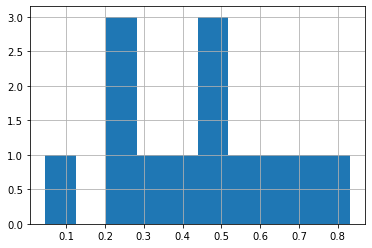

In [16]:
csv_out.em_fraction.hist()